<a href="https://colab.research.google.com/github/joaofernandesw/analise-nomes-bebes-eua/blob/main/analise-nomes-bebes-eua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import os

In [6]:
!git clone https://github.com/wesm/pydata-book.git

Cloning into 'pydata-book'...
remote: Enumerating objects: 553, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 553 (delta 23), reused 3 (delta 3), pack-reused 525 (from 1)
Receiving objects: 100% (553/553), 63.76 MiB | 17.97 MiB/s, done.
Resolving deltas: 100% (209/209), done.
Updating files: 100% (208/208), done.


In [7]:
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
  path = '/content/pydata-book/datasets/babynames/yob%d.txt' % year
  frame = pd.read_csv(path, names=columns)

  frame['year'] = year
  pieces.append(frame)

names = pd.concat(pieces, ignore_index=True)

names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [8]:
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = '/content/pydata-book/datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year

    frame['prop'] = frame['births'] / frame['births'].sum()

    pieces.append(frame)


names = pd.concat(pieces, ignore_index=True)

names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.035064
1,Anna,F,2604,1880,0.012924
2,Emma,F,2003,1880,0.009941
3,Elizabeth,F,1939,1880,0.009623
4,Minnie,F,1746,1880,0.008666
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000001
1690780,Zyonne,M,5,2010,0.000001
1690781,Zyquarius,M,5,2010,0.000001
1690782,Zyran,M,5,2010,0.000001


In [16]:
def maior_aumento(nome, sexo):

  filter_df = names[(names['name'] == nome) & (names['sex'] == sexo)]
  filter_df = filter_df.sort_values('year')
  filter_df['increase'] = filter_df['prop'].diff()
  biggest_increase = filter_df.nlargest(1, 'increase')
  return biggest_increase

maior_aumento('Maddox', 'F')


,name,sex,births,year,prop,increase
1456836,Maddox,F,54,2004,0.000014,0.000008


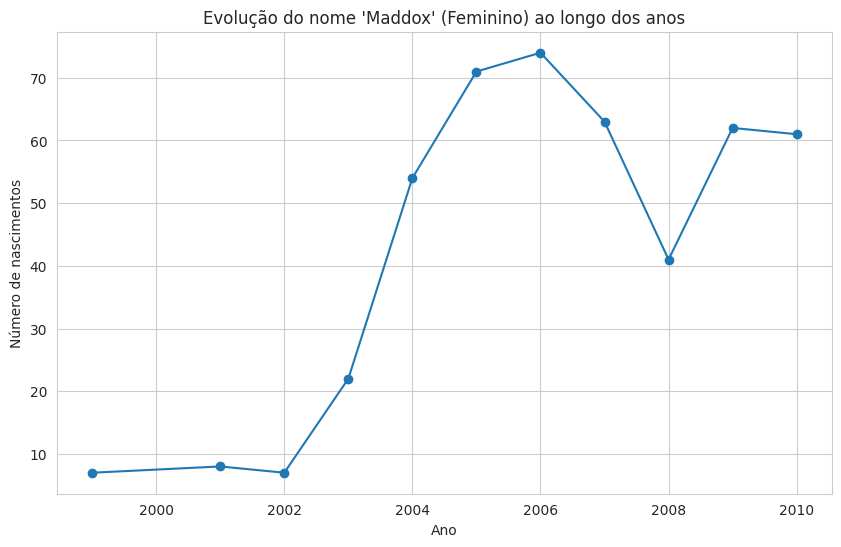

In [21]:
import matplotlib.pyplot as plt

filtro = names[(names['name'] == 'Maddox') & (names['sex'] == 'F')]

filtro = filtro.sort_values('year')

plt.figure(figsize=(10,6))
plt.plot(filtro['year'], filtro['births'], marker='o')

plt.title("Evolução do nome 'Maddox' (Feminino) ao longo dos anos")
plt.xlabel("Ano")
plt.ylabel("Número de nascimentos")
plt.grid(True)
plt.show()
